In [1]:
%matplotlib notebook
import numpy as np
import time

from qastools.interpolation import interpolate_and_save, bin_data
from databroker import Broker
db = Broker.named("qas")
import matplotlib.pyplot as plt

In [2]:
uid= db[-1].start['uid']
#uid = "94ffd468-746c-4817-8740-30fa68780c50"

print(uid)
print(time.ctime(db[uid].start['time']))

res_dict = interpolate_and_save('qas', 'qas-analysis', uid, mono_name='mono1_enc', pulses_per_degree=None, e0=8979)
interp_df = res_dict['interp_df']
bin_df = res_dict['bin_df']

interp_df_filename = res_dict['interp_df_filename']
bin_df_filename = res_dict['interp_df_filename']


print("saved interp_df to {}".format(interp_df_filename))
print("saved bin_df to {}".format(bin_df_filename))

23ce7e5c-3ca9-45d4-9b67-95d8982308dd
Thu Mar  8 17:36:24 2018
Converting to energy, using key mono1_enc
saved interp_df to /nsls2/xf07bm/data/interpolated_data/2018/03/08/xas_1c9212.txt
saved bin_df to /nsls2/xf07bm/data/interpolated_data/2018/03/08/xas_1c9212.txt


In [3]:
print(db[uid].start)
print(db[uid].stop)


Run Start
PI              : No PI                                   
PROPOSAL        : None                                    
SAF             : None                                    
angle_offset    : -0.0998577922152                        
beamline_id     : QAS                                     
comment         :                                         
cycle           : 1                                       
edge            : K                                       
element         : Copper ( 29)                            
experiment      : transmission                            
group           : qas                                     
name            : test38                                  
pba1_adc6 offset: -0.4969419                              
pba1_adc7 offset: -0.1187948611111111                     
plan_args       :
plan_name       : execute_trajectory                      
plan_type       : generator                               
proposal_id     : None     

<IPython.core.display.Javascript object>


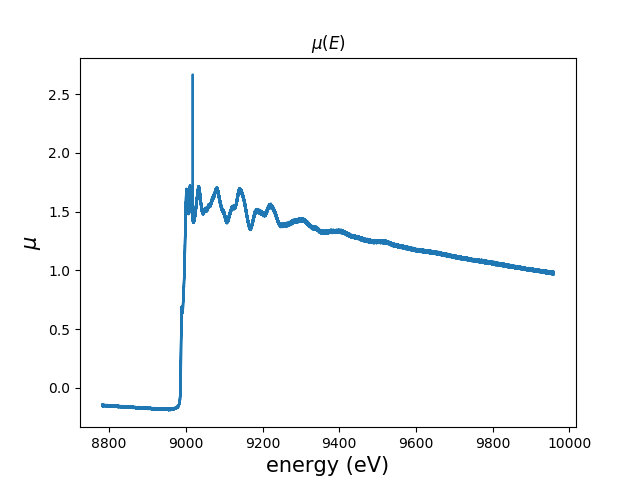

In [4]:

plt.figure(0);
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))

#plt.plot(interp_df.it)
plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
#plt.plot(interp_df.energy,'+')

<IPython.core.display.Javascript object>


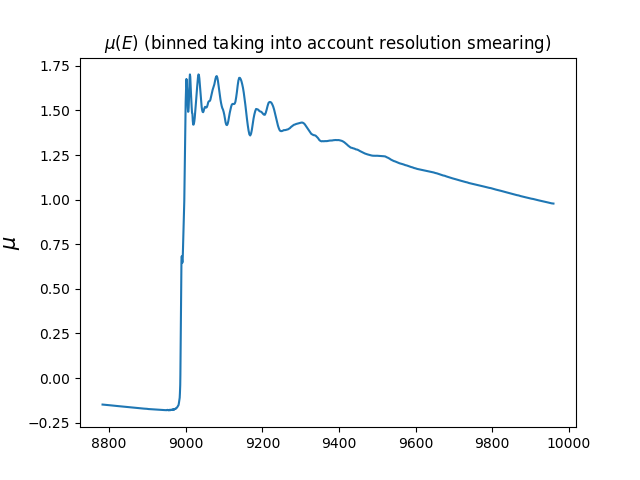

In [5]:
plt.figure(1)
plt.plot(bin_df.energy, np.log(bin_df.i0/bin_df.it))
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
plt.title("$\mu (E)$ (binned taking into account resolution smearing)")

<IPython.core.display.Javascript object>


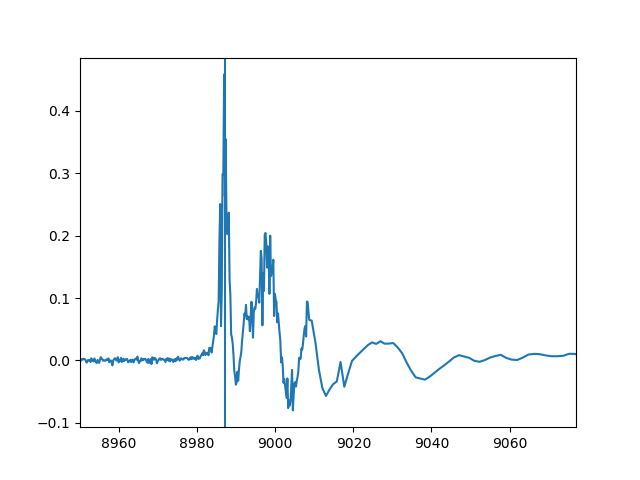

(8950, 9077)

In [6]:
# finding the edge
avg_energy = (bin_df.energy.values[1:] + bin_df.energy.values[:-1])*.5

plt.figure(2);plt.clf()
plt.plot(avg_energy, np.diff(np.log(bin_df.i0/bin_df.it))/np.diff(bin_df.energy))
plt.axvline(8987)
plt.xlim(8950, 9077)